In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data, io
from skimage.filters import gaussian, threshold_otsu
from skimage.segmentation import active_contour
from IPython.display import Image
import glob
import os

In [7]:
image_paths = glob.glob('.\\images\\*.jpg')

(400, 2)


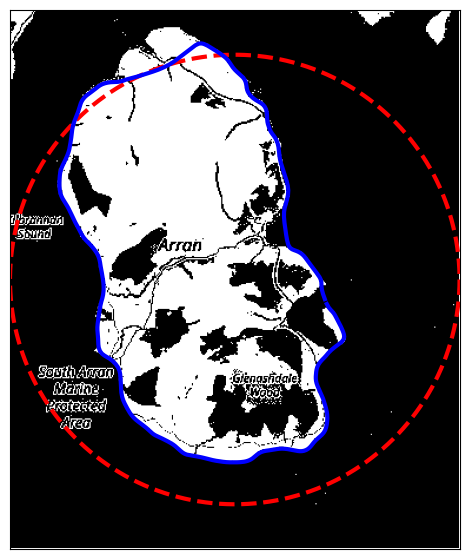

(400, 2)


<Figure size 640x480 with 0 Axes>

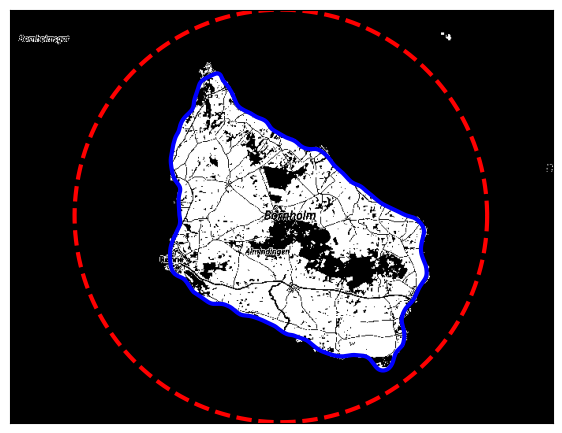

(400, 2)


<Figure size 640x480 with 0 Axes>

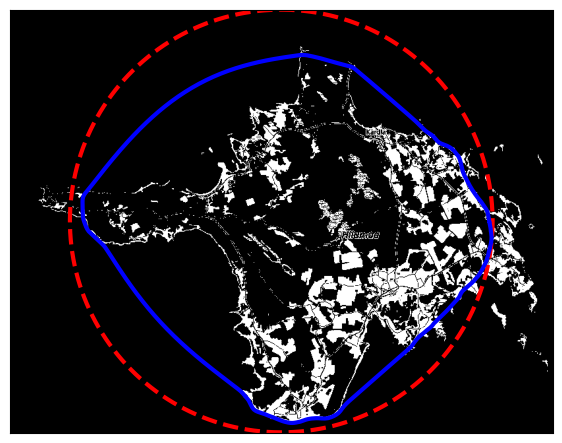

(400, 2)


<Figure size 640x480 with 0 Axes>

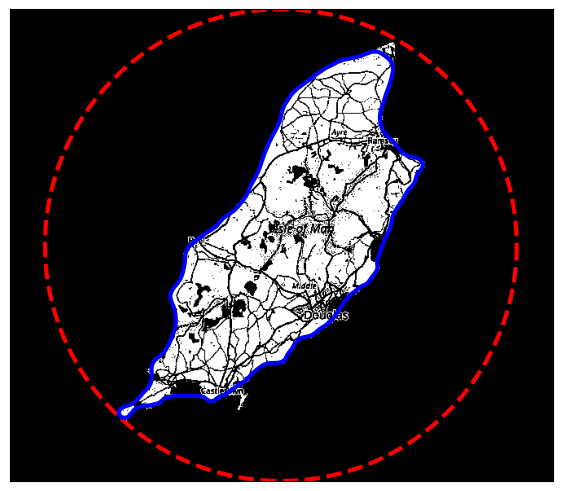

<Figure size 640x480 with 0 Axes>

In [9]:
for image_path in image_paths:
    image = io.imread(image_path)
    image = rgb2gray(image)

    thresh = threshold_otsu(image)
    image = image > thresh

    radius = min(image.shape[0], image.shape[1]) // 2

    s = np.linspace(0, 2*np.pi, 400)
    r = image.shape[0]//2 + radius*np.sin(s)
    c = image.shape[1]//2 + radius*np.cos(s)
    init = np.array([r, c]).T

    snake = active_contour(gaussian(image, 3, preserve_range=False), init, alpha=0.015, beta=0.01, gamma=0.01)

    print(snake.shape)

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(image, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, image.shape[1], image.shape[0], 0])
    plt.show()
    
    plt.savefig(os.path.join('.\\images_annotated\\', image_path.split('\\')[-1]))

In [3]:
image = io.imread("images\IsleOfMan.jpg")
image = rgb2gray(image)

In [6]:
thresh = threshold_otsu(image)
image = image > thresh

In [7]:
image.shape

(580, 667)

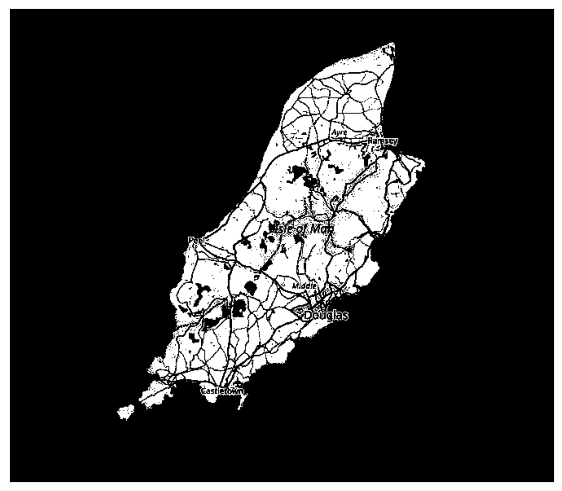

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap=plt.cm.gray)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.show()

In [9]:
image.shape

(580, 667)

In [10]:
if image.shape[0] > image.shape[1]:
    image = np.pad(image, ((0,0), ((image.shape[0] - image.shape[1])//2, (image.shape[0] - image.shape[1])//2)), 'constant', constant_values=(0,0))
else:
    image = np.pad(image, (((image.shape[1] - image.shape[0])//2, (image.shape[1] - image.shape[0])//2), (0,0)), 'constant', constant_values=(0,0))

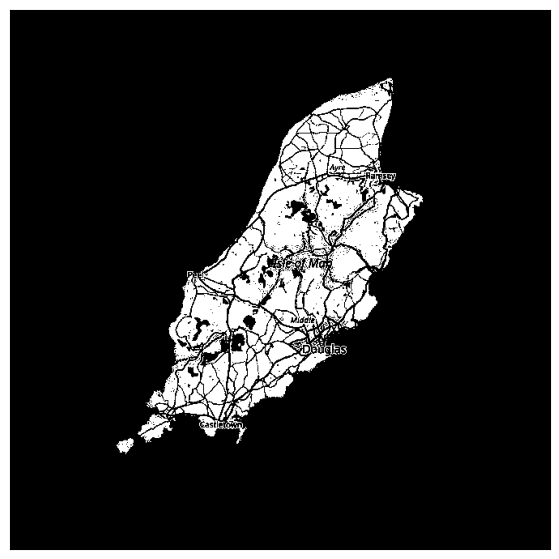

In [11]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap=plt.cm.gray)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.show()

In [13]:
image.shape

(666, 667)

(400, 2)


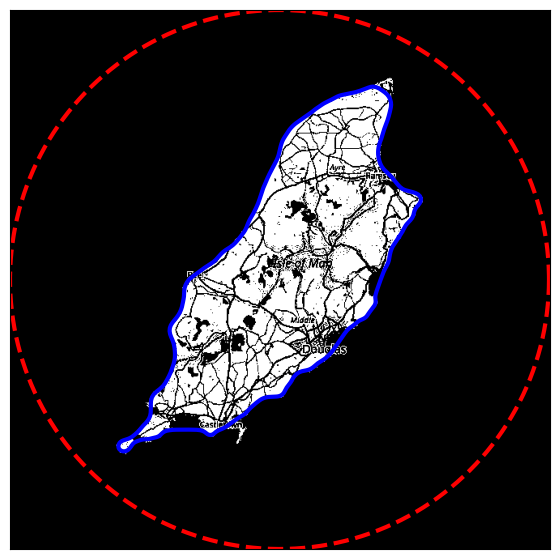

In [12]:
radius = min(image.shape[0], image.shape[1]) // 2

s = np.linspace(0, 2*np.pi, 400)
r = image.shape[0]//2 + radius*np.sin(s)
c = image.shape[1]//2 + radius*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(image, 3, preserve_range=False), init, alpha=0.015, beta=0.01, gamma=0.01)

print(snake.shape)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.show()

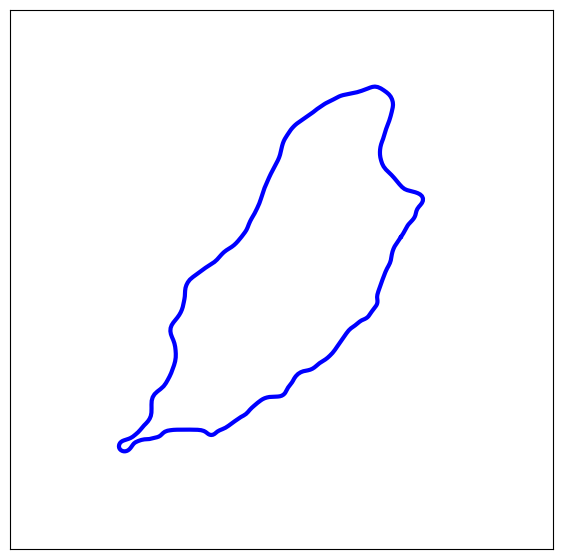

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])
plt.show()

In [16]:
snake.shape

(400, 2)

In [5]:
import pandas as pd

In [19]:
data = pd.read_csv('island_annotation.csv').iloc[:16,:]

In [20]:
data = data.drop(columns=['image_path']).values.transpose()

In [21]:
data.shape

(800, 16)

In [22]:
mean_features = data.mean(axis=1)

In [23]:
mean_snake = mean_features.reshape((-1,2))

In [24]:
mean_snake.shape

(400, 2)

In [25]:
im = np.zeros((700, 700))

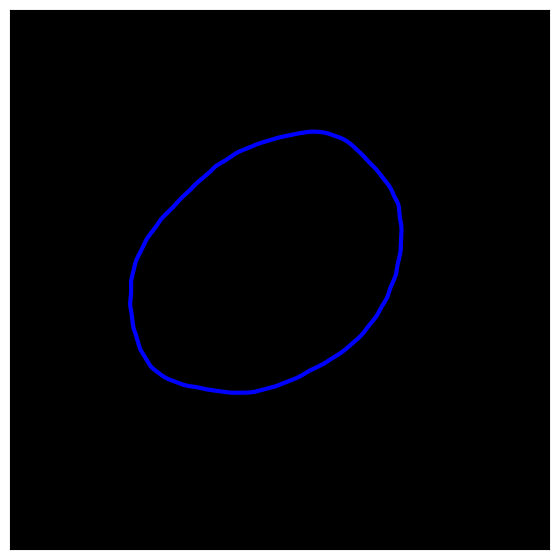

In [26]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(mean_snake[:, 1], mean_snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])
plt.show()

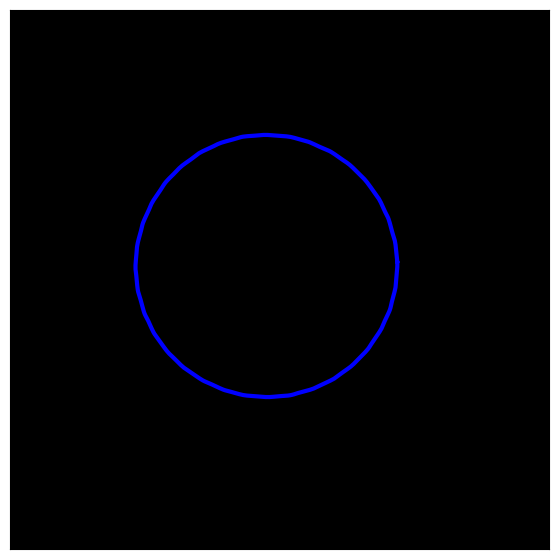

<Figure size 640x480 with 0 Axes>

In [27]:
df = pd.read_csv('island_annotation.csv')
data = df.drop(columns=['image_path']).values.transpose()
mean_features = data.mean(axis=1)
mean_snake = mean_features.reshape((-1,2))

im = np.zeros((700, 700))

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(mean_snake[:, 1], mean_snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])
plt.savefig("mean_island.jpg")

In [ ]:
# Put mean face on an unseen image
im = io.imread('fn01.jpg')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(mean_snake[:, 1], mean_snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])
plt.savefig("fn01_annot.jpg")